# Major Assignment - I

In [4]:
students = [
    {"student id": 1, "Math": 50, "Computer Science": 60, "Science": 73},
    {"student id": 2, "Math": 40, "Computer Science": 50, "Science": 55},
    {"student id": 3, "Math": 90, "Computer Science": 70, "Science": 95},
    {"student id": 4, "Math": 80, "Computer Science": 62, "Science": 72},
    {"student id": 5, "Math": 80, "Computer Science": 90, "Science": 45},
    {"student id": 6, "Math": 84, "Computer Science": 90, "Science": 50},
    {"student id": 7, "Math": 90, "Computer Science": 95, "Science": 55},
    {"student id": 8, "Math": 89, "Computer Science": 93, "Science": 53},
    {"student id": 9, "Math": 88, "Computer Science": 92, "Science": 58},
    {"student id": 10, "Math": 90, "Computer Science": 95, "Science": 55},
    {"student id": 11, "Math": 70, "Computer Science": 65, "Science": 39},
    {"student id": 12, "Math": 65, "Computer Science": 60, "Science": 35},
    {"student id": 13, "Math": 60, "Computer Science": 55, "Science": 30},
    {"student id": 14, "Math": 55, "Computer Science": 57, "Science": 25},
    {"student id": 15, "Math": 49, "Computer Science": 54, "Science": 22},
    {"student id": 16, "Math": 10, "Computer Science": 30, "Science": 11},
    {"student id": 17, "Math": 50, "Computer Science": 40, "Science": 16},
    {"student id": 18, "Math": 90, "Computer Science": 45, "Science": 80},
    {"student id": 19, "Math": 70, "Computer Science": 50, "Science": 39},
    {"student id": 20, "Math": 70, "Computer Science": 80, "Science": 75},
]

In [5]:
maths_marks = [student["Math"] for student in students]
science_marks = [student["Science"] for student in students]
cs_marks = [student["Computer Science"] for student in students]

1. Write a Python program to group the student ids corresponding to the following Science mark.
 • less or equal to 30.
 • between 30 and 70.
 • more than 70.

In [6]:
from collections import defaultdict

from data import students

groups = defaultdict(list)
for student in students:
    student_id, mark = student["student id"], student["Science"]
    if mark <= 30:
        groups["<30"].append(student_id)
    elif 30 < mark <= 70:
        groups["30-70"].append(student_id)
    else:
        groups["70+"].append(student_id)

print(dict(groups))


{'70+': [1, 3, 4, 18, 20], '30-70': [2, 5, 6, 7, 8, 9, 10, 11, 12, 19], '<30': [13, 14, 15, 16, 17]}


 2. Create a line chart for student ids and Computer Science marks. Student id on the x-axis and Computer Science
 mark on the y-axis.

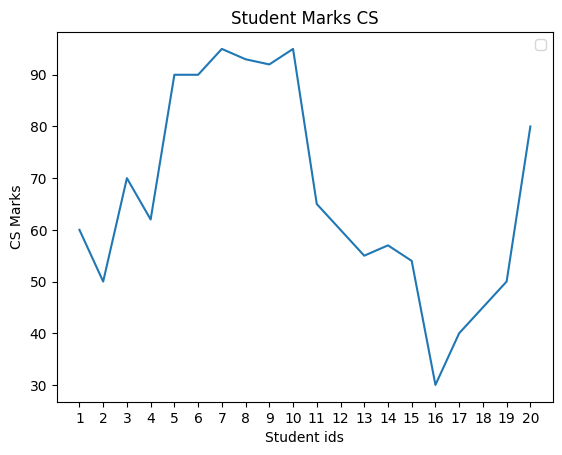

In [7]:
from matplotlib import pyplot as plt

from data import students

students_ids = [student["student id"] for student in students]

plt.title("Student Marks CS")
plt.legend(["Student", "CS Marks"])
plt.xticks(students_ids)
plt.xlabel('Student ids')
plt.ylabel("CS Marks")
plt.plot(students_ids, cs_marks)
# plt.show()
plt.savefig("CS Marks plot", dpi=200)

3. Write a Python program to create a list of 20 vectors by taking student’s Math, Computer Science and Science marks. Find the sum of all these 20 vectors. After that, find the average marks for Math, Computer Science and Science.
Hint: [50,60,73] will be one vector.

In [8]:
vectors = [[student["Math"], student["Computer Science"], student["Science"]] for student in students]
print(vectors)

[[50, 60, 73], [40, 50, 55], [90, 70, 95], [80, 62, 72], [80, 90, 45], [84, 90, 50], [90, 95, 55], [89, 93, 53], [88, 92, 58], [90, 95, 55], [70, 65, 39], [65, 60, 35], [60, 55, 30], [55, 57, 25], [49, 54, 22], [10, 30, 11], [50, 40, 16], [90, 45, 80], [70, 50, 39], [70, 80, 75]]


4. Write a Python program to find the mean, median and mode of Computer Science marks.

In [9]:
from collections import Counter


def mean(marks):
    return sum(marks) / len(marks)


def median(marks):
    marks = sorted(marks)
    n = len(marks)
    if n % 2 == 0:
        return (marks[(n - 1) // 2] + marks[n // 2]) / 2
    else:
        return marks[n // 2]


def mode(marks):
    ctr = Counter(marks)
    return max(ctr.items(), key=lambda x: x[1])[0]


print(f"{mean(cs_marks) = }, {median(cs_marks) = }, {mode(cs_marks) = }")

mean(cs_marks) = 66.65, median(cs_marks) = 61.0, mode(cs_marks) = 60


5. Write a Python program to find the covariance of Math and Science marks.

In [10]:
def covariance(marks1, marks2):
    n = len(marks1)
    x_mean = sum(marks1) / n
    y_mean = sum(marks2) / n
    return sum((xi - x_mean) * (yi - y_mean) for xi, yi in zip(marks1, marks2)) / (n - 1)


print(f"{covariance(maths_marks, science_marks) = }")

covariance(maths_marks, science_marks) = 299.657894736842


6. Write a Python program to find the correlation between Computer Science and Math marks.


In [13]:
import math


def variance(marks):
    x_mean = mean(marks)
    return sum(pow(xi - x_mean, 2) for xi in marks) / (len(marks) - 1)


def standard_deviation(marks):
    return math.sqrt(variance(marks))


def correlation(marks1, marks2):
    std_deviation_x = standard_deviation(marks1)
    std_deviation_y = standard_deviation(marks2)
    if std_deviation_x > 0 and std_deviation_y > 0:
        return covariance(marks1, marks2) / (std_deviation_x * std_deviation_y)
    else:
        return 0


hours_movie = [10, 12, 14, 8]
hours_sleep = [40, 48, 56, 32]
print(f"{covariance(hours_movie, hours_sleep) = }")
print(f"{correlation(hours_movie, hours_sleep) = }")


covariance(hours_movie, hours_sleep) = 26.666666666666668
correlation(hours_movie, hours_sleep) = 1.0000000000000002
